In [7]:
#importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

#importing warnings to suppress wherever required
import warnings
warnings.filterwarnings("ignore")

In [8]:
#Accesing the data from file folder
r=pd.read_csv("D:/Fliprobo/Time Series/Time Series Company/Company Stock and Investment.csv")
stock=pd.DataFrame(r)
stock.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013


In [9]:
stock.dtypes

Date                        object
Oil Investments            float64
Gold Investments           float64
Comp Stock                 float64
Other sharesInvestments    float64
dtype: object

In [10]:
#converting the date datatype
stock['Date']=pd.to_datetime(stock['Date'],format='%d-%m-%Y')
stock

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,2009-12-31,0.025417,0.000150,0.017354,0.006848
1,2010-01-04,0.026830,0.001097,0.015565,-0.004609
2,2010-01-05,0.002699,0.001560,0.001729,0.005900
3,2010-01-06,0.021688,0.006009,-0.015906,-0.018116
4,2010-01-07,-0.006256,0.000221,-0.001849,-0.017013
...,...,...,...,...,...
1979,2017-11-09,0.005984,0.000623,-0.002043,-0.003310
1980,2017-11-10,-0.007173,-0.000389,-0.006880,-0.003348
1981,2017-11-13,0.000352,-0.004944,-0.004008,0.003395
1982,2017-11-14,-0.019376,-0.002621,-0.015118,0.006793


In [11]:
#dropping the other features
stock.drop(['Oil Investments','Comp Stock','Other sharesInvestments'],axis=1,inplace=True)

#setting date as my index column
stock.set_index('Date',inplace=True)

In [12]:
stock.head()

,Gold Investments
Date,
2009-12-31,0.000150
2010-01-04,0.001097
2010-01-05,0.001560
2010-01-06,0.006009
2010-01-07,0.000221


In [13]:
#importing adfuller for check the data stationarity
from statsmodels.tsa.stattools import adfuller

def adfuller_test(sales):
    result=adfuller(sales) # same as above ,variable name changed
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ") 

In [14]:
adfuller_test(stock['Gold Investments'])

ADF Test Statistic : -15.906853851669043
p-value : 8.208405770369246e-29
#Lags Used : 7
Number of Observations Used : 1976
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


In [15]:
# average the daily sales value for each month 
y = stock['Gold Investments'].resample('MS').mean()
y['2011':]

Date
2011-01-01   -0.002236
2011-02-01    0.003260
2011-03-01    0.000888
2011-04-01   -0.096499
2011-05-01   -0.000071
                ...   
2017-07-01    0.001025
2017-08-01   -0.086243
2017-09-01   -0.001084
2017-10-01   -0.000442
2017-11-01    0.000870
Freq: MS, Name: Gold Investments, Length: 83, dtype: float64

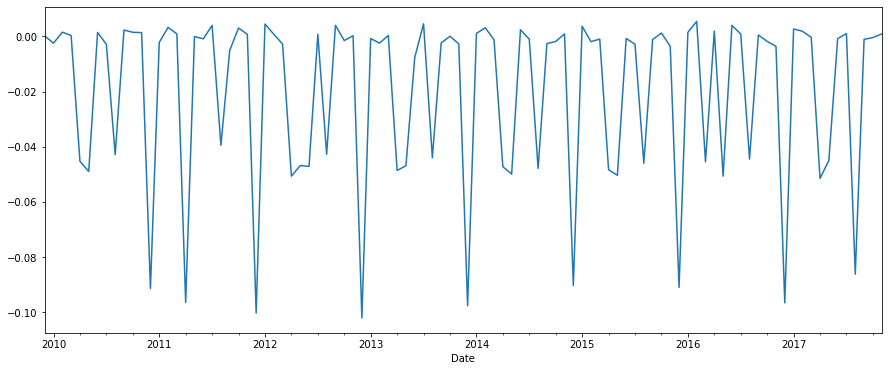

In [16]:
y.plot(figsize = (15, 6))
plt.show()

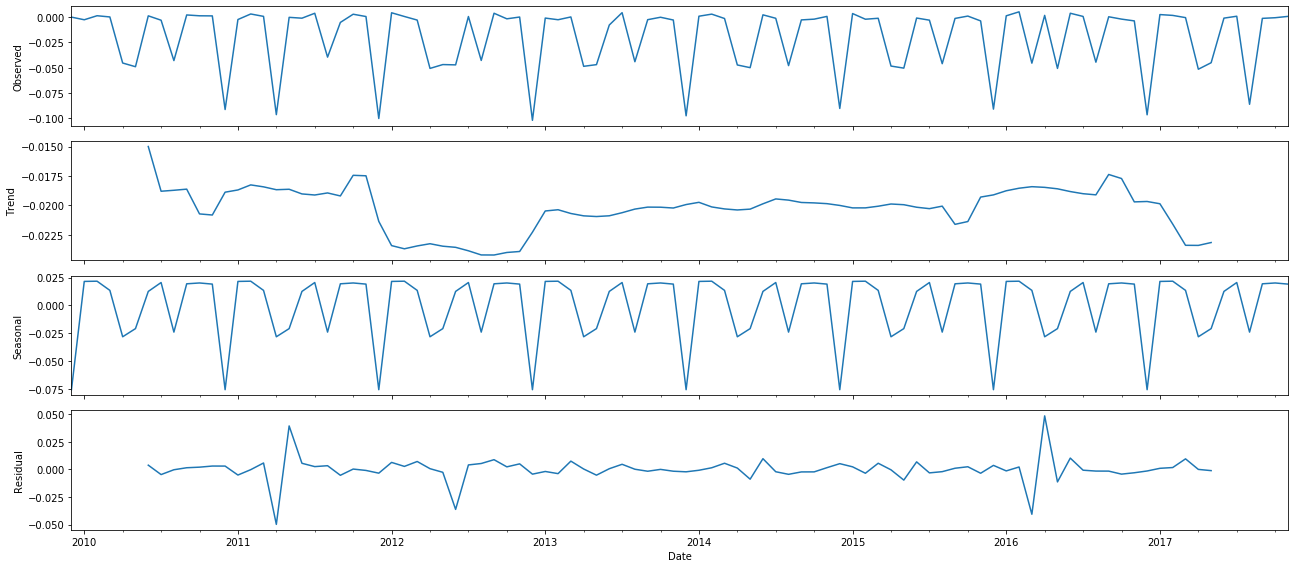

In [17]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model = 'additive')
fig = decomposition.plot()
plt.show()

In [18]:
#take all possible combination for p, d and q
import itertools

# set the typical ranges for p, d, q
p = d = q = range(0, 2)

pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [19]:
# Using Grid Search find the optimal set of parameters that yields the best performance
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False) 
            result = mod.fit()   
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:-359.72532090513914
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:-412.20147134929607
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-416.74478547754495
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-433.45795056844065
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-468.0464714993435
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-478.7936361361684
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-430.9463243204474
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-431.7698551557641
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:-359.03787874590637
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:-410.2272865130184
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-422.29163784765603
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-439.5166729670655
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-469.6802135354259
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-482.26417392298157
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-436.71286844758174
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-437.7873980288379
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-301.2979559458459
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-34

In [20]:
#Fitting the ARIMA model using above optimal combination of p, d, q (optimal means combination at which we got lowest AIC score)

model = sm.tsa.statespace.SARIMAX(y, order = (1, 1, 1),seasonal_order = (1, 0, 1, 12))
result = model.fit()
print(result.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3974      0.086     -4.633      0.000      -0.566      -0.229
ma.L1         -0.8674      0.053    -16.262      0.000      -0.972      -0.763
ar.S.L12       0.9525      0.036     26.294      0.000       0.882       1.024
ma.S.L12      -0.5157      0.130     -3.953      0.000      -0.771      -0.260
sigma2         0.0003   3.66e-05      8.254      0.000       0.000       0.000


In [18]:
#getting prediction according to the results
prediction = result.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
prediction_ci = prediction.conf_int()
prediction_ci

,lower Gold Investments,upper Gold Investments
Date,,
2017-01-01,-0.029316,0.038819
2017-02-01,-0.035009,0.033125
2017-03-01,-0.056585,0.011548
2017-04-01,-0.063817,0.004316
2017-05-01,-0.069060,-0.000927
2017-06-01,-0.037512,0.030620
2017-07-01,-0.037159,0.030973
2017-08-01,-0.077891,-0.009759
2017-09-01,-0.024783,0.043349


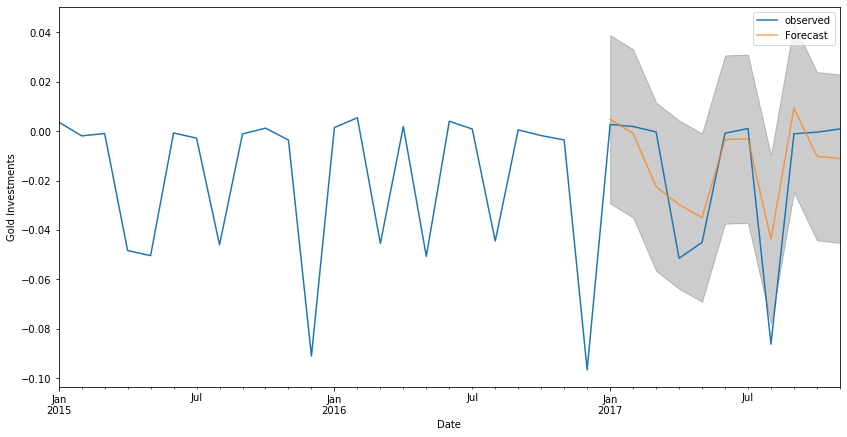

In [19]:
#Visualize the forecasting
ax = y['2015':].plot(label = 'observed')
prediction.predicted_mean.plot(ax = ax, label = 'Forecast', alpha = 0.7, figsize = (14, 7))
ax.fill_between(prediction_ci.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel("Date")
ax.set_ylabel('Gold Investments')
plt.legend()
plt.show()

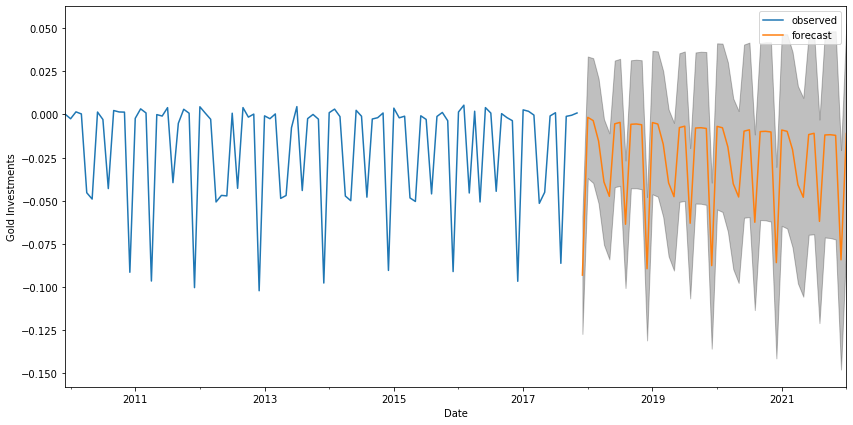

In [22]:
# forcasting for out of sample data
pred_uc = result.get_forecast(steps = 50)
pred_ci = pred_uc.conf_int()

ax = y.plot(label = 'observed', figsize = (14, 7))
pred_uc.predicted_mean.plot(ax = ax, label = 'forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Gold Investments')

plt.legend()
plt.show()
